In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, f1_score


from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True, precision=5)

from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import DBSCAN

from sklearn.metrics import homogeneity_score

%matplotlib inline

In [161]:
X, y = make_blobs(n_samples = 150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

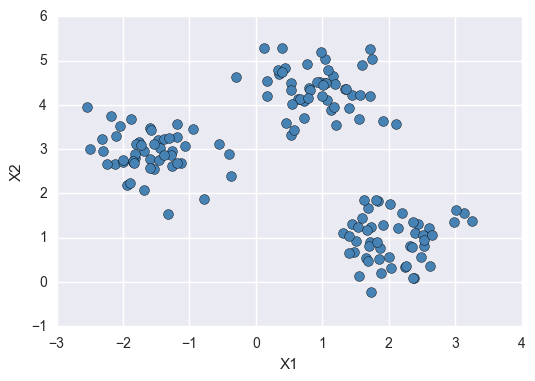

In [162]:
plt.scatter(X[:, 0], X[:, 1], c = "steelblue", marker = "o", s = 50)
plt.xlabel("X1")
plt.ylabel("X2")

In [163]:
km = KMeans(n_clusters=3, init="random", n_init = 10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)

In [22]:
def show_cluster(estimator, X, y, ignore_noise = True):
    levels = set(y)
    
    if ignore_noise and -1 in levels:
        levels.remove(-1)
    
    #markers = ["o", "s", "v", "v", "^"]
    #marker = markers[k], 
    colors = sns.color_palette("husl", len(levels))
    centroids = estimator.cluster_centers_ if hasattr(estimator, "cluster_centers_") else None 

    for k in levels:
        data = X[y == k, :]
        plt.scatter(data[:, 0], data[:, 1], color = colors[k], s = 50, label = "Cluster %s" % k)

    if not centroids is None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color = "black", marker = "*", s = 150)

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()

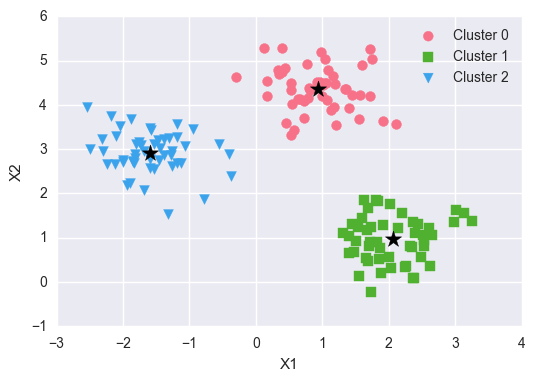

In [165]:
show_cluster(km, X, y_km)

In [38]:
print("Distortion (Within Cluster SSE): %.2f" % km.inertia_)

Distortion (Within Cluster SSE): 72.48


In [62]:
km.cluster_centers_[0, 0]

0.93296509996749966

In [166]:
homogeneity_score(y, y_km)

1.0

# Find optimal number of clusters using elbow method

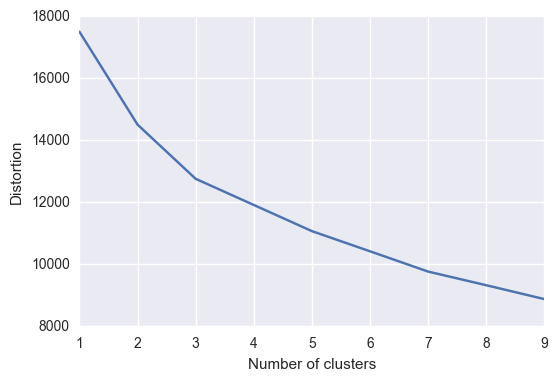

In [35]:
def find_elbow(X, n = 10):
    distortions = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0, init="k-means++")
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1, n), distortions)
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")

find_elbow(X)

## Find number of clusters from Dendogram

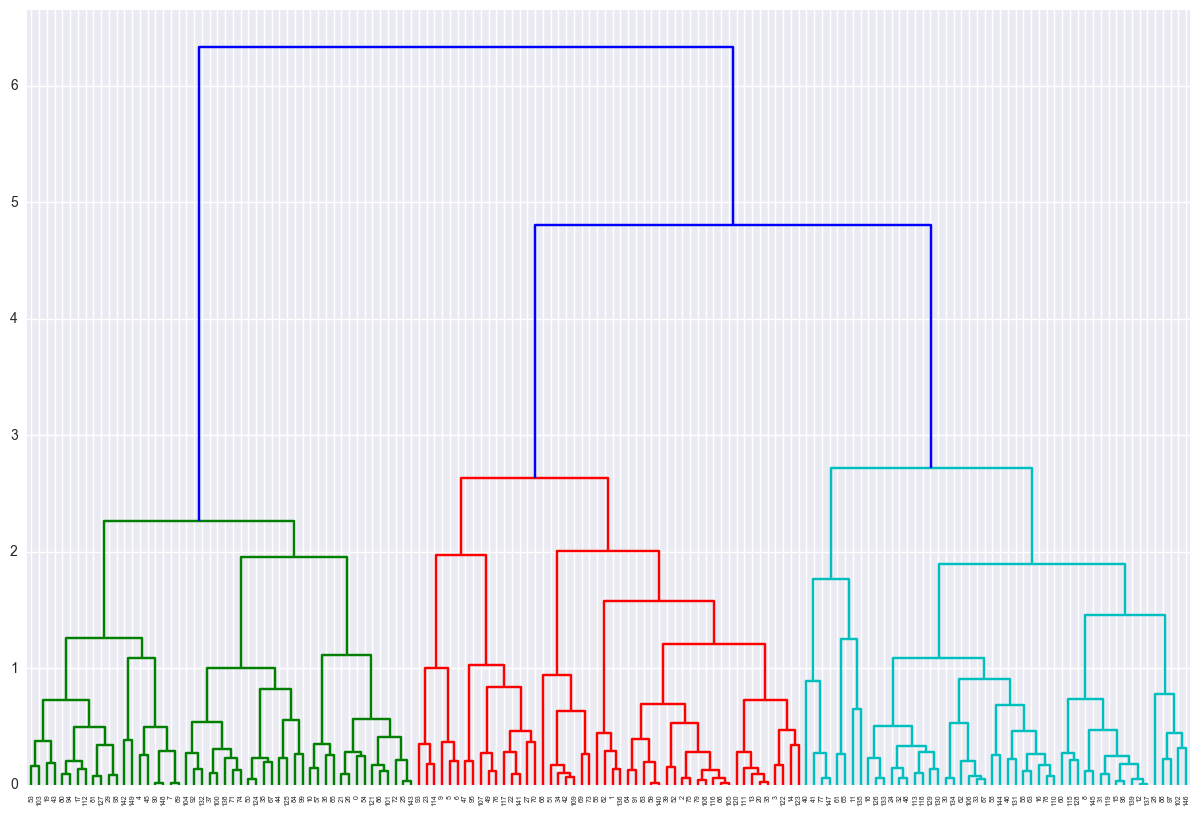

In [89]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X, method="complete", metric="euclidean")
f = dendrogram(row_clusters)

# Half Moon Dataset and DBSCAN

In [152]:
from sklearn.datasets import make_moons

In [167]:
X, y = make_moons(n_samples=200, noise=0.09, random_state=0)

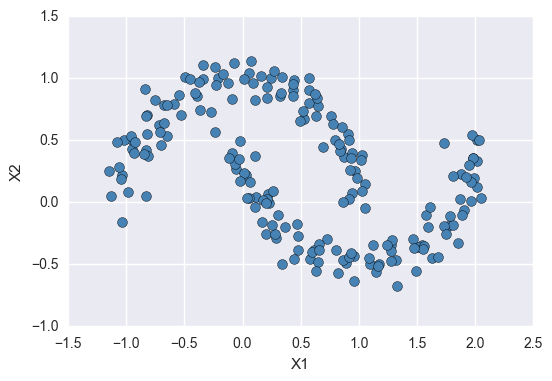

In [168]:
plt.scatter(X[:, 0], X[:, 1], c = "steelblue", marker = "o", s = 50)
plt.xlabel("X1")
plt.ylabel("X2")

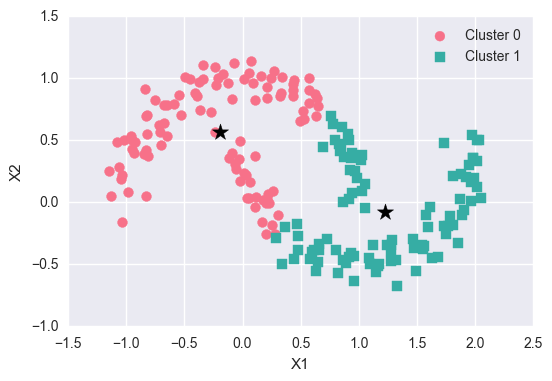

In [169]:
km = KMeans(n_clusters=2, init="random", n_init = 10, max_iter = 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
show_cluster(km, X, y_km)

In [175]:
homogeneity_score(y, y_km)

0.18109823201826031

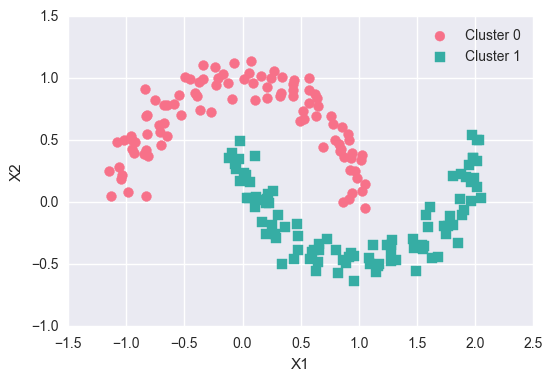

In [170]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric="euclidean", )
y_db = dbscan.fit_predict(X)
show_cluster(dbscan, X, y_db)

In [171]:
labels = set(y_db)
if -1 in labels: #Noise
    labels.remove(-1)
print("No of clusters: ", len(labels))

No of clusters:  2


In [173]:
homogeneity_score(y, y_db)

0.98377443751081795

# Applying clustering to grouplens movies dataset based on genre

In [143]:
movies = pd.read_csv("/Volumes/SONY/Data/movie_lens/ml-latest-small/movies.csv", index_col="movieId")
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [144]:
movies["genres"]

movieId
1         Adventure|Animation|Children|Comedy|Fantasy
2                          Adventure|Children|Fantasy
3                                      Comedy|Romance
4                                Comedy|Drama|Romance
5                                              Comedy
6                               Action|Crime|Thriller
7                                      Comedy|Romance
8                                  Adventure|Children
9                                              Action
10                          Action|Adventure|Thriller
11                               Comedy|Drama|Romance
12                                      Comedy|Horror
13                       Adventure|Animation|Children
14                                              Drama
15                           Action|Adventure|Romance
16                                        Crime|Drama
17                                      Drama|Romance
18                                             Comedy
19                  

In [145]:
movies = movies[~movies["genres"].str.contains("\(no genres listed\)")]
movies.sample(10)

,title,genres
movieId,,
6859,"Devil and Daniel Webster, The (All That Money ...",Drama|Fantasy
2184,"Trouble with Harry, The (1955)",Comedy|Mystery
5005,Separate Tables (1958),Drama
76258,Varg Veum - Fallen Angels (Varg Veum - Falne E...,Crime|Drama|Thriller
3852,"Tao of Steve, The (2000)",Comedy
110828,Devil's Knot (2013),Crime|Drama|Thriller
144656,The Measure of a Man (2015),Drama
5728,Death Hunt (1981),Action|Adventure|Crime|Thriller
36276,Hidden (a.k.a. Cache) (Caché) (2005),Drama|Mystery|Thriller


In [146]:
genres = set()
movies["genres"].apply(lambda g: genres.update(g.split(r"|")))
genres = list(genres)
genres.sort()
print(genres, len(genres))

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 19


In [147]:
def to_vector(g):
    indices = np.array([genres.index(v) for v in g.split(r"|")])
    l = np.zeros(len(genres))
    l[indices] = 1
    return l

genres_idx = movies["genres"].apply(to_vector)
genres_idx.head(10)

movieId
1     [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
2     [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
3     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
5     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
6     [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
7     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
8     [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: genres, dtype: object

In [148]:
X = np.array(genres_idx.tolist())
print("X.shape: ", X.shape)

X.shape:  (10322, 19)


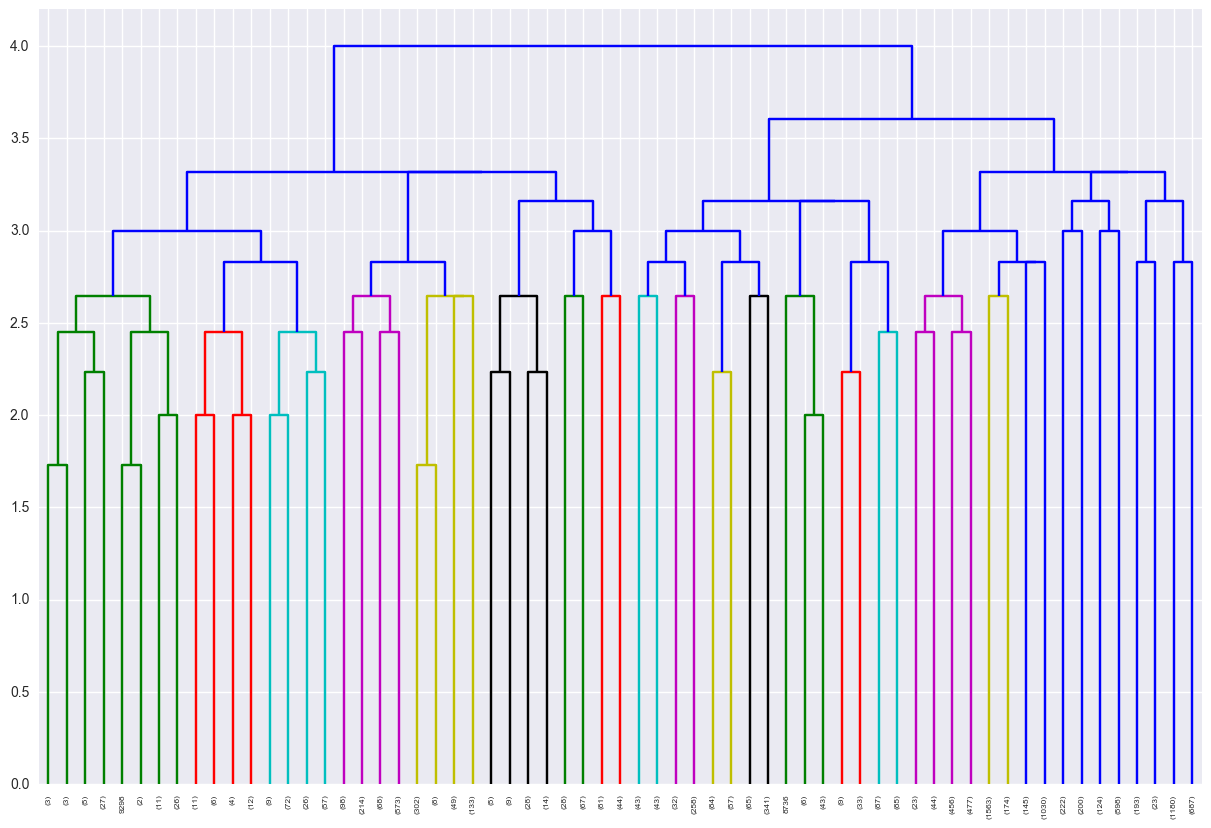

In [10]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X, method="complete", metric="euclidean")
f = dendrogram(row_clusters, p = 5, truncate_mode="level")

In [84]:
from sklearn.decomposition import KernelPCA, PCA

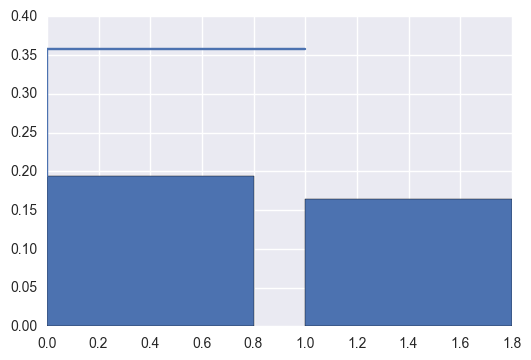

In [149]:
pca = PCA(n_components = 2, random_state=0)
X_pca = pca.fit_transform(X)

ratios = pca.explained_variance_ratio_
plt.bar(range(len(ratios)), ratios)
plt.step(range(len(ratios)), np.cumsum(ratios), label = "Cumsum of Explained variance ratio")

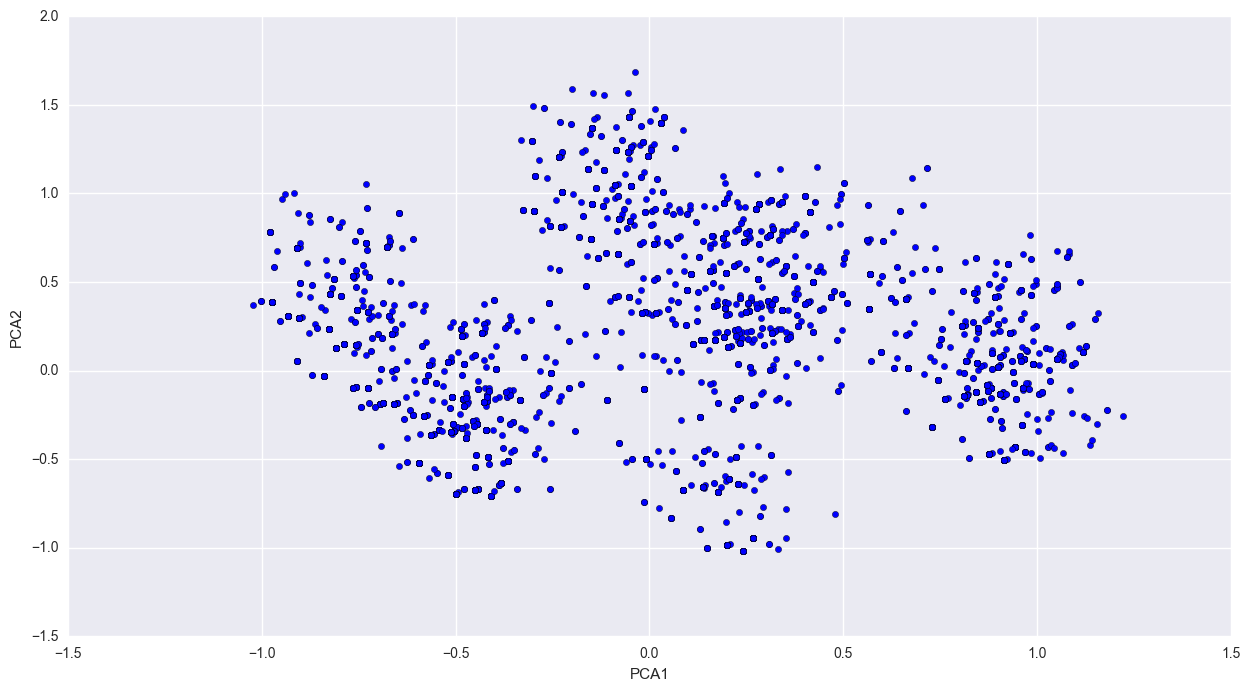

In [150]:
plt.figure(figsize = (15, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PCA1")
plt.ylabel("PCA2")

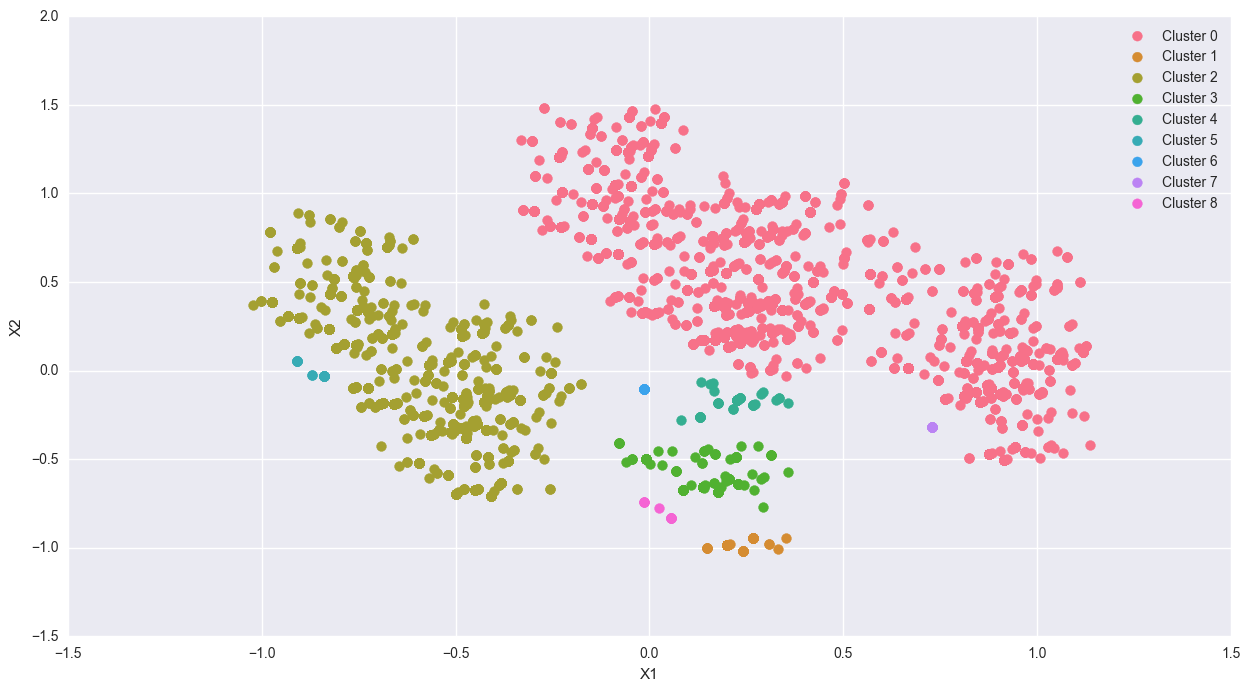

In [151]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric="euclidean")
y_db = dbscan.fit_predict(X_pca)
plt.figure(figsize = (15, 8))
show_cluster(dbscan, X_pca, y_db)

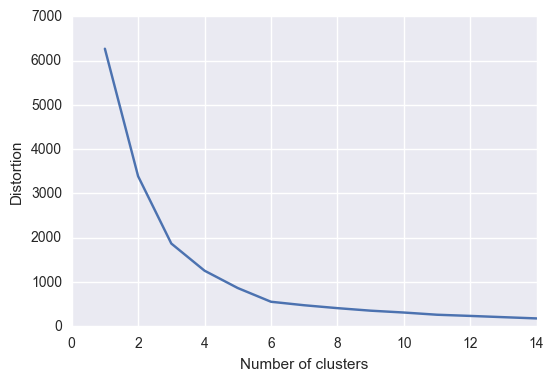

In [152]:
find_elbow(X_pca, 15)

In [153]:
knn = KMeans(n_clusters=6, max_iter=300, random_state=0)
y_pred = knn.fit_predict(X_pca)

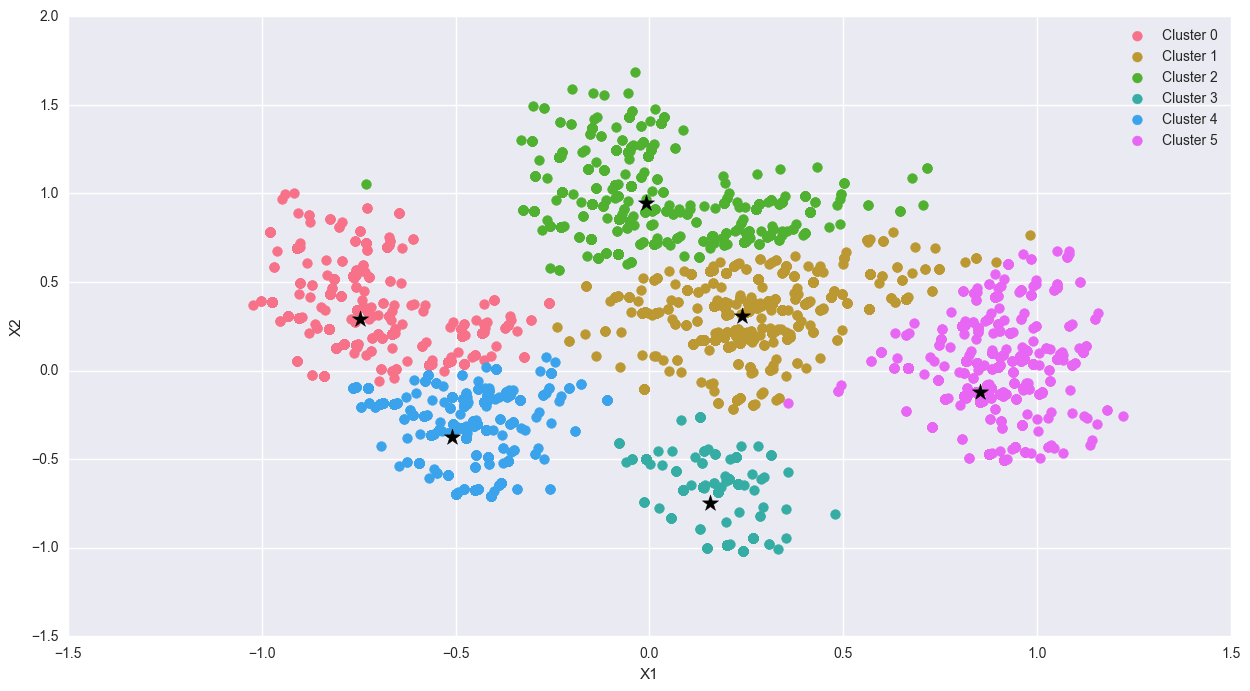

In [154]:
plt.figure(figsize = (15, 8))
show_cluster(knn, X_pca, y_pred)

In [155]:
movies[y_pred == 3]

,title,genres
movieId,,
4,Waiting to Exhale (1995),Comedy|Drama|Romance
11,"American President, The (1995)",Comedy|Drama|Romance
52,Mighty Aphrodite (1995),Comedy|Drama|Romance
58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance
72,Kicking and Screaming (1995),Comedy|Drama
75,Big Bully (1996),Comedy|Drama
82,Antonia's Line (Antonia) (1995),Comedy|Drama
84,Last Summer in the Hamptons (1995),Comedy|Drama
94,Beautiful Girls (1996),Comedy|Drama|Romance


In [156]:
movies[y_pred == 5]

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
5,Father of the Bride Part II (1995),Comedy
7,Sabrina (1995),Comedy|Romance
12,Dracula: Dead and Loving It (1995),Comedy|Horror
18,Four Rooms (1995),Comedy
19,Ace Ventura: When Nature Calls (1995),Comedy
39,Clueless (1995),Comedy|Romance
54,"Big Green, The (1995)",Children|Comedy


In [157]:
movies[y_pred == 2]

,title,genres
movieId,,
6,Heat (1995),Action|Crime|Thriller
10,GoldenEye (1995),Action|Adventure|Thriller
23,Assassins (1995),Action|Crime|Thriller
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
44,Mortal Kombat (1995),Action|Adventure|Fantasy
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
